In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00017-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00018-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00021-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00022-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00023-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00025-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00027-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined1_df = dataframes[0]
for df in dataframes[1:]:
    combined1_df = combined1_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined1_file.csv'
combined1_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined1_file.csv\part-00000-43525de4-2570-4860-b51a-e525ee4af484-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,2.06,46.59,63.78,1.397840,1.397840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6212.14,588.14,592.00,591.807000,0.841267,588.14,8.367716e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
1,0.000000,54.00,6.00,64.00,2.130290,2.130290,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.333181e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
2,0.007771,3.30,42.14,82.46,7.248154,7.248154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5318.32,363.68,562.76,499.266282,84.471087,523.34,8.365140e+07,9.5,31.241641,119.606136,18999.091436,0.40,141.55,Mirai-greip_flood
3,0.327774,96.06,6.00,64.00,4.346313,4.346313,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1.12,0.65,0.00,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,572.52,54.00,54.68,54.435978,0.310957,54.48,8.297254e+07,9.5,10.433866,0.439334,0.570149,0.17,141.55,DoS-SYN_Flood
4,0.100559,42845.28,16.78,65.91,8829.262382,8829.262382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.00,0.04,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,529.98,50.00,53.86,50.274942,0.967162,52.90,8.301656e+07,9.5,10.014543,0.574124,2.071866,0.08,141.55,DoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,0.000000,54.00,6.00,64.00,48.738956,48.738956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.303769e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
701745,0.000000,54.00,6.00,64.00,19.220050,19.220050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336199e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
701746,0.109663,126040.50,17.00,64.00,756.283226,756.283226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9561.00,362.00,1456.40,876.562241,544.138853,938.00,8.337042e+07,9.5,41.680604,769.472095,311678.811559,0.95,141.55,DDoS-UDP_Fragmentation
701747,0.037309,24399.50,16.84,64.39,18049.510038,18049.510038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,565.68,52.01,90.68,57.255457,12.078158,52.49,8.310303e+07,9.5,10.569066,16.948363,809.610955,0.19,141.55,DDoS-UDP_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            108634
DDoS-UDP_Flood              81696
DDoS-TCP_Flood              67862
DDoS-PSHACK_Flood           61414
DDoS-SYN_Flood              60937
DDoS-RSTFINFlood            60566
DDoS-SynonymousIP_Flood     53800
DoS-UDP_Flood               49955
DoS-TCP_Flood               40016
DoS-SYN_Flood               30199
BenignTraffic               16651
Mirai-greeth_flood          14805
Mirai-udpplain              13338
Mirai-greip_flood           11203
DDoS-ICMP_Fragmentation      6765
MITM-ArpSpoofing             4594
DDoS-UDP_Fragmentation       4398
DDoS-ACK_Fragmentation       4287
DNS_Spoofing                 2774
Recon-HostDiscovery          2031
Recon-OSScan                 1516
Recon-PortScan               1286
DoS-HTTP_Flood               1101
VulnerabilityScan             565
DDoS-HTTP_Flood               444
DDoS-SlowLoris                374
DictionaryBruteForce          170
BrowserHijacking               85
SqlInjection                   64
CommandInjecti

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

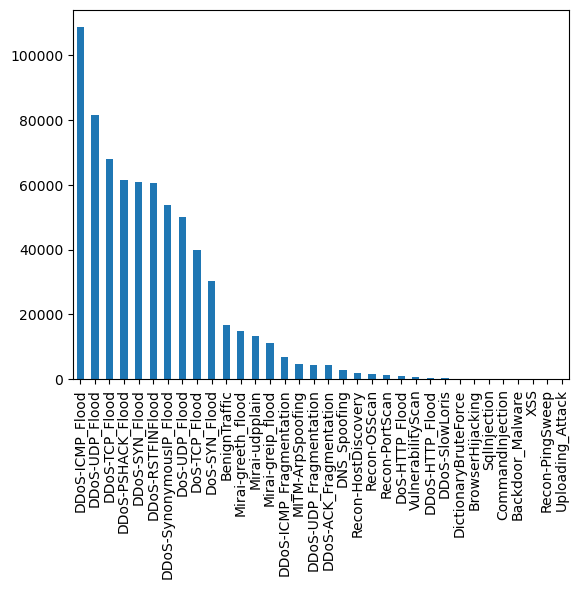

In [6]:
bar_graph('label')

In [7]:
#change Multi-class to binary-class
df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [8]:
df['label'].unique()

array(['Mirai-greeth_flood', 'DDoS-PSHACK_Flood', 'Mirai-greip_flood',
       'DoS-SYN_Flood', 'DoS-UDP_Flood', 'DDoS-ICMP_Flood',
       'DDoS-RSTFINFlood', 'DDoS-UDP_Flood', 'DoS-TCP_Flood',
       'DDoS-SYN_Flood', 'DDoS-TCP_Flood', 'Mirai-udpplain',
       'DDoS-ICMP_Fragmentation', 'VulnerabilityScan',
       'DDoS-UDP_Fragmentation', 'DDoS-SynonymousIP_Flood',
       'DDoS-ACK_Fragmentation', 'MITM-ArpSpoofing', 'BenignTraffic',
       'CommandInjection', 'Recon-PortScan', 'DNS_Spoofing',
       'Recon-HostDiscovery', 'Recon-OSScan', 'DDoS-SlowLoris',
       'DoS-HTTP_Flood', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'DDoS-HTTP_Flood', 'Backdoor_Malware', 'XSS',
       'Uploading_Attack', 'Recon-PingSweep'], dtype=object)

In [9]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,2.06,46.59,63.78,1.397840,1.397840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6212.14,588.14,592.00,591.807000,0.841267,588.14,8.367716e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,23
1,0.000000,54.00,6.00,64.00,2.130290,2.130290,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.333181e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
2,0.007771,3.30,42.14,82.46,7.248154,7.248154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5318.32,363.68,562.76,499.266282,84.471087,523.34,8.365140e+07,9.5,31.241641,119.606136,18999.091436,0.40,141.55,24
3,0.327774,96.06,6.00,64.00,4.346313,4.346313,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,1.12,0.65,0.00,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,572.52,54.00,54.68,54.435978,0.310957,54.48,8.297254e+07,9.5,10.433866,0.439334,0.570149,0.17,141.55,19
4,0.100559,42845.28,16.78,65.91,8829.262382,8829.262382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.00,0.04,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,529.98,50.00,53.86,50.274942,0.967162,52.90,8.301656e+07,9.5,10.014543,0.574124,2.071866,0.08,141.55,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,0.000000,54.00,6.00,64.00,48.738956,48.738956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.303769e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
701745,0.000000,54.00,6.00,64.00,19.220050,19.220050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336199e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,12
701746,0.109663,126040.50,17.00,64.00,756.283226,756.283226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9561.00,362.00,1456.40,876.562241,544.138853,938.00,8.337042e+07,9.5,41.680604,769.472095,311678.811559,0.95,141.55,15
701747,0.037309,24399.50,16.84,64.39,18049.510038,18049.510038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,565.68,52.01,90.68,57.255457,12.078158,52.49,8.310303e+07,9.5,10.569066,16.948363,809.610955,0.19,141.55,14


In [10]:
x=df.drop(columns=['label'])
y=df['label']

In [11]:
y

0         23
1          8
2         24
3         19
4         21
          ..
701744    13
701745    12
701746    15
701747    14
701748     9
Name: label, Length: 701749, dtype: int32

In [12]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 561399
Testing set: 140350


In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.7987246170288564
precision: 0.8066604385620766
recall:  0.7987246170288564
f1:  0.7634075446854168


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9924759529747061
precision: 0.9921017666885695
recall:  0.9924759529747061
f1:  0.9919015331722392


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.790195938724617
precision: 0.7514971235462262
recall:  0.790195938724617
f1:  0.7370484285152983


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

# neural network

In [18]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [19]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(561399, 46)
(561399, 34)
(140350, 46)
(140350, 34)


In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [23]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
7008/7018 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.8017
Epoch 1: val_accuracy improved from -inf to 0.81852, saving model to nn.hdf5
7018/7018 [==============================] - 13s 2ms/step - loss: 0.4460 - accuracy: 0.8018 - val_loss: 0.4082 - val_accuracy: 0.8185
Epoch 2/20
7012/7018 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.8830
Epoch 2: val_accuracy improved from 0.81852 to 0.93806, saving model to nn.hdf5
7018/7018 [==============================] - 12s 2ms/step - loss: 0.2816 - accuracy: 0.8831 - val_loss: 0.1562 - val_accuracy: 0.9381
Epoch 3/20
7012/7018 [============================>.] - ETA: 0s - loss: 0.1406 - accuracy: 0.9462
Epoch 3: val_accuracy improved from 0.93806 to 0.95324, saving model to nn.hdf5
7018/7018 [==============================] - 12s 2ms/step - loss: 0.1405 - accuracy: 0.9462 - val_loss: 0.1167 - val_accuracy: 0.9532
Epoch 4/20
7007/7018 [============================>.] - ETA: 0s - l

Text(0, 0.5, 'accuracy')

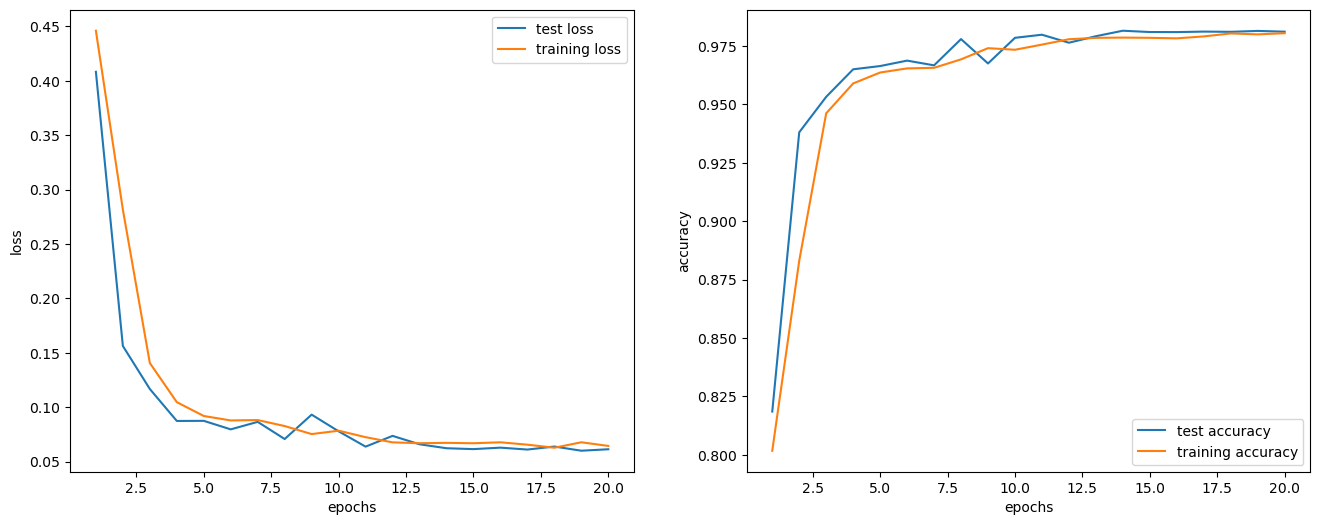

In [24]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [25]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

4386/4386 [==============================] - 3s 690us/step
Precision score:  0.9802906475892049
Recall score:  0.9816530103313146
F1 score:  0.9801699850699152


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
